# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fransiskus Abel Pramuadi Putra
- **Email:** fransiskusabelp.putra@gmail.com
- **ID Dicoding:** fransiskusabelpp

## Menentukan Pertanyaan Bisnis

- Bagaimana trend perentalan peminjaman sepeda?
- Bagaimana pengaruh perubahan musim terhadap rata-rata perentalan sepeda?
- Bagaimana pengaruh perbedaan hari kerja terhadap intensitas perentalan sepeda?

## Import Semua Packages/Library yang Digunakan

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Gathering Data**

- **Load dataset**

In [71]:
# Mengambil data dari github dan menyetorkan ke dalam variabel bike_df
bike_df = pd.read_csv("https://raw.githubusercontent.com/fransiskusabelpp/proyek-akhir-data-analisis-dicoding/main/Bike-sharing-dataset/day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Pada kolom season, yr, mnth, weekday, workingday, weathersit memiliki nilai yang sulit untuk dibaca. Nilai tersebut perlu diubah dengan mengacu pada file 'Readme.txt'<br>
<br>
Pada kolom temp, atemp, hum, windspeed memiliki nilai yang telah dinormalisasi. Kita perlu mengembalikan nilainya kembali ke keadaan normal dengan mengacu pada file 'Readme.txt'

### Assessing Data

- **Menilai bike_df**

In [72]:
print("Jumlah duplikasi: ", bike_df.duplicated().sum())
bike_df.info()

Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak ada duplikasi data pada dataset. Namun kita perlu mengubah tipe data yang ada karena penggunaannya yang tidak tepat dan tidak sesuai dengan panduan dalam file 'Readme.txt'

In [73]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value

In [74]:
# bike_df.describe(include='all')
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Cleaning Data**

- **Mengganti nama kolom agar mudah dibaca**

Kita perlu mengganti nama kolom dataset terlebih dahulu untuk memudahkan kita mengidentifikasi kolom

In [75]:
bike_df.rename(columns = {
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'weathersit' : 'weather',
    'temp' : 'temperature_celcius',
    'atemp': 'atemp_celcius',
    'hum' : 'humidity',
    'cnt' : 'total_rental_bikes'
}, inplace = True)

- **Mengganti tipe data yang sesuai**

Selanjutnya kita melakukan penyesuaian tipe data yang digunakan

In [76]:
bike_df['date'] = pd.to_datetime(bike_df['date'])
bike_df['season'] = bike_df.season.astype('category')
bike_df['month'] = bike_df.month.astype('category')
bike_df['holiday'] = bike_df.holiday.astype('category')
bike_df['weekday'] = bike_df.weekday.astype('category')
bike_df['workingday'] = bike_df.workingday.astype('category')
bike_df['weather'] = bike_df.weather.astype('category')

In [77]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   date                 731 non-null    datetime64[ns]
 2   season               731 non-null    category      
 3   year                 731 non-null    int64         
 4   month                731 non-null    category      
 5   holiday              731 non-null    category      
 6   weekday              731 non-null    category      
 7   workingday           731 non-null    category      
 8   weather              731 non-null    category      
 9   temperature_celcius  731 non-null    float64       
 10  atemp_celcius        731 non-null    float64       
 11  humidity             731 non-null    float64       
 12  windspeed            731 non-null    float64       
 13  casual               731 non-null  

Sudah tampak bahwa tipe data telah sesuai dengan kolom yang ada

- **Menyesuaikan nilai agar mudah untuk dibaca dan diklasifikasi**

Selanjutnya kita akan mengubah nilai yang memiliki tipe data kategori berdasarkan file 'Readme.txt'

In [78]:
bike_df.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
bike_df.year.replace((0,1), (2011,2012), inplace=True)
bike_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike_df.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike_df.workingday.replace((0,1),('No', 'Yes'), inplace=True)
bike_df.holiday.replace((0,1),('No', 'Yes'), inplace=True)
bike_df.weather.replace((1,2,3,4), ('Clear', 'Misty', 'Light_rainsnow', 'Heavy_rainsnow'), inplace=True)

- **Mengubah nilai yang telah dinormalisasi**

Lalu kita akan mengembalikan nilai yang telah dinormalisasi menjadi nilai normal

In [79]:
bike_df['temperature_celcius'] = bike_df['temperature_celcius']*41
bike_df['atemp_celcius'] = bike_df['atemp_celcius']*50
bike_df['humidity'] = bike_df['humidity']*100
bike_df['windspeed'] = bike_df['windspeed']*67

Mari kita lihat hasil dari cleaning data yang telah kita lakukan

In [80]:
bike_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature_celcius,atemp_celcius,humidity,windspeed,casual,registered,total_rental_bikes
0,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Terlihat bahwa dataset kini telah mudah untuk dibaca

## **Exploratory Data Analysis (EDA)**

### **Explorasi bike_df**

- **Melihat nilai statistik dari bike_df**

In [81]:
bike_df.describe(include="all")

<ipython-input-81-1fd7ad7f3914>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_df.describe(include="all")


,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature_celcius,atemp_celcius,humidity,windspeed,casual,registered,total_rental_bikes
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,Jan,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


- **Memisahkan dataset berdasarkan tahun**

In [82]:
bike_2011_df = bike_df[bike_df['year'] == 2011]
bike_2012_df = bike_df[bike_df['year'] == 2012]

In [83]:
bike_2011_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature_celcius,atemp_celcius,humidity,windspeed,casual,registered,total_rental_bikes
0,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [84]:
bike_2012_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temperature_celcius,atemp_celcius,humidity,windspeed,casual,registered,total_rental_bikes
365,366,2012-01-01,Spring,2012,Jan,No,Sunday,No,Clear,15.170000,18.78105,69.2500,12.875189,686,1608,2294
366,367,2012-01-02,Spring,2012,Jan,Yes,Monday,No,Clear,11.194763,12.61520,38.1304,22.087555,244,1707,1951
367,368,2012-01-03,Spring,2012,Jan,No,Tuesday,Yes,Clear,6.150000,6.31375,44.1250,24.499957,89,2147,2236
368,369,2012-01-04,Spring,2012,Jan,No,Wednesday,Yes,Misty,4.407500,5.96685,41.4583,12.374900,95,2273,2368
369,370,2012-01-05,Spring,2012,Jan,No,Thursday,Yes,Clear,10.899153,13.92060,52.4167,8.709129,140,3132,3272


- **Melihat data rental sepeda berdasarkan urutan bulan**

In [85]:
bike_df.groupby(by = ['month']).agg({
    'total_rental_bikes' : ['sum','mean']
})

total_rental_bikes             
                     sum         mean
month                                
Jan               134933  2176.338710
Feb               151352  2655.298246
Mar               228920  3692.258065
Apr               269094  4484.900000
May               331686  5349.774194
Jun               346342  5772.366667
Jul               344948  5563.677419
Aug               351194  5664.419355
Sep               345991  5766.516667
Oct               322352  5199.225806
Nov               254831  4247.183333
Dec               211036  3403.806452

Dari data statistik diatas, dapat dilihat bahwwa urutan pertama intensitas tertinggi penyewaan sepeda terjadi pada bulan Agustus sebanyak 351194 kali. Urutan kedua terjadi pada bulan Juni sebanyak 346342 kali. Lalu urutan ketiga terjadi pada bulan Juli sebanyak 344948 kali.

- **Melihat perkembangan rental sepeda terhadap perubahan musim**

In [86]:
bike_df.groupby(by = ['season']).agg({
    'total_rental_bikes' : ['sum','mean']
})

total_rental_bikes             
                      sum         mean
season                                
Spring             471348  2604.132597
Summer             918589  4992.331522
Fall              1061129  5644.303191
Winter             841613  4728.162921

User lebih banyak melakukan penyewaan sepeda pada musim Fall dan Summer

- **Melihat hubungan musim yang terjadi tiap bulan terhadap perkembangan rental sepeda**

In [87]:
bike_df.groupby(by = ['month','season']).agg({
    'total_rental_bikes' : ['sum','mean']
})

total_rental_bikes             
                            sum         mean
month season                                
Jan   Spring             134933  2176.338710
      Summer                  0          NaN
      Fall                    0          NaN
      Winter                  0          NaN
Feb   Spring             151352  2655.298246
      Summer                  0          NaN
      Fall                    0          NaN
      Winter                  0          NaN
Mar   Spring             142065  3551.625000
      Summer              86855  3947.954545
      Fall                    0          NaN
      Winter                  0          NaN
Apr   Spring                  0          NaN
      Summer             269094  4484.900000
      Fall                    0          NaN
      Winter                  0          NaN
May   Spring                  0          NaN
      Summer             331686  5349.774194
      Fall                    0          NaN
      Winter                  0          NaN
Jun   Spring                  0          NaN
      Summer             230954  5773.850000
      Fall               115388  5769.400000
      Winter                  0          NaN
Jul   Spring                  0          NaN
      Summer                  0          NaN
      Fall               344948  5563.677419
      Winter                  0          NaN
Aug   Spring                  0          NaN
      Summer                  0          NaN
      Fall               351194  5664.419355
      Winter                  0          NaN
Sep   Spring                  0          NaN
      Summer                  0          NaN
      Fall               249599  5672.704545
      Winter              96392  6024.500000
Oct   Spring                  0          NaN
      Summer                  0          NaN
      Fall                    0          NaN
      Winter             322352  5199.225806
Nov   Spring                  0          NaN
      Summer                  0          NaN
      Fall                    0          NaN
      Winter             254831  4247.183333
Dec   Spring              42998  1954.454545
      Summer                  0          NaN
      Fall                    0          NaN
      Winter             168038  4200.950000

Terlihat dalam data yang ditunjukkan, pada bulan Juni, Juli, Agustus hanya terjadi musim Fall dan Summer yang menyebabkan intensitas penyewaan sepeda mengalami kenaikan yang signifikan.

- **Mencari perilaku user dalam hari kerja terhadap penyewaan sepeda**

In [88]:
bike_df.groupby(by = 'workingday').agg({
    'total_rental_bikes' : ['sum','mean']
})

total_rental_bikes             
                          sum         mean
workingday                                
No                    1000269  4330.168831
Yes                   2292410  4584.820000

Dari data yang ditampilkan, terlihat bahwa user lebih sering melakukan penyewaan sepeda ketika hari mereka sedang bekerja. Kemungkinan sepeda yang mereka sewa digunakan untuk mobilisasi mereka dalam bekerja.<br><br>

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Bagaimana trend perentalan sepeda setiap tahunnya?**

Untuk dapat memvisualisasikan trend. Lakukanlah grouping untuk data bikes rental pada tahun 2011 terlebih dahulu untuk menentukan variabel yang akan dipakai

In [89]:
monthly_2011_bike_rental = bike_2011_df.resample(rule='M', on='date').agg({
    'total_rental_bikes' : 'sum'
})
monthly_2011_bike_rental.index = monthly_2011_bike_rental.index.strftime('%Y-%m')
monthly_2011_bike_rental = monthly_2011_bike_rental.reset_index()
monthly_2011_bike_rental.head()

,date,total_rental_bikes
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


Setelah mengetahui variabel atau kolom yang digunakan untuk memvisualisasikan trend. Buatlah line chart untuk merepresentasikan trend perentalan sepada tahun 2011

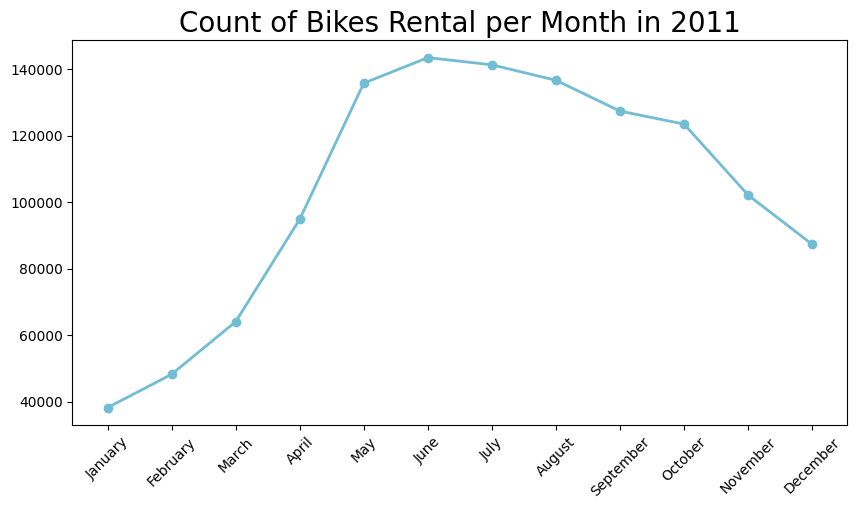

In [90]:
monthly_2011_bike_rental = bike_2011_df.resample(rule='M', on='date').agg({
    'total_rental_bikes' : 'sum'
})
monthly_2011_bike_rental.index = monthly_2011_bike_rental.index.strftime('%B')# Mengubah format order date menjadi nama bulan
monthly_2011_bike_rental = monthly_2011_bike_rental.reset_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_2011_bike_rental["date"], monthly_2011_bike_rental["total_rental_bikes"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Count of Bikes Rental per Month in 2011", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)  # Memutar label sumbu x sebesar 45 derajat
plt.yticks(fontsize=10)
plt.show()

In [91]:
# Menemukan bulan dengan nilai tertinggi
highest_month = monthly_2011_bike_rental['total_rental_bikes'].idxmax()

# Menampilkan bulan dan nilai tertinggi
print("Bulan dengan nilai tertinggi:", monthly_2011_bike_rental.loc[highest_month, 'date'])
print("Nilainya:", monthly_2011_bike_rental.loc[highest_month, 'total_rental_bikes'])

Bulan dengan nilai tertinggi: June
Nilainya: 143512


Line chart diatas adalah trend perkembangan penyewaan sepeda pada tahun 2011<br><br>

Melakukan grouping untuk data bikes rental pada tahun 2012 untuk menentukan variabel yang akan dipakai

In [92]:
monthly_2012_bike_rental = bike_2012_df.resample(rule='M', on='date').agg({
    'total_rental_bikes' : 'sum'
})
monthly_2012_bike_rental.index = monthly_2012_bike_rental.index.strftime('%Y-%m')
monthly_2012_bike_rental = monthly_2012_bike_rental.reset_index()
monthly_2012_bike_rental.head()

,date,total_rental_bikes
0,2012-01,96744
1,2012-02,103137
2,2012-03,164875
3,2012-04,174224
4,2012-05,195865


Setelah mengetahui variabel atau kolom yang digunakan untuk memvisualisasikan trend. Buatlah line chart untuk merepresentasikan trend perentalan sepada tahun 2012

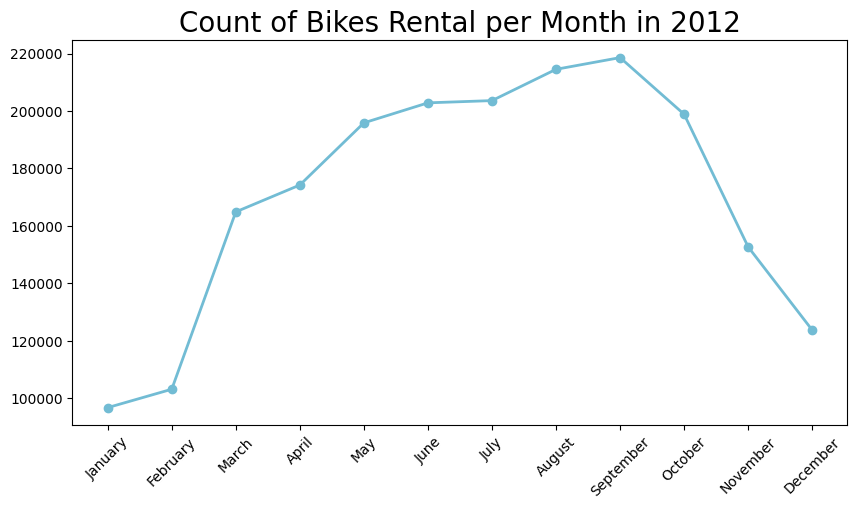

In [93]:
monthly_2012_bike_rental = bike_2012_df.resample(rule='M', on='date').agg({
    'total_rental_bikes' : 'sum'
})
monthly_2012_bike_rental.index = monthly_2012_bike_rental.index.strftime('%B')# Mengubah format order date menjadi nama bulan
monthly_2012_bike_rental = monthly_2012_bike_rental.reset_index()

plt.figure(figsize=(10, 5))
plt.plot(monthly_2012_bike_rental["date"], monthly_2012_bike_rental["total_rental_bikes"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Count of Bikes Rental per Month in 2012", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)  # Memutar label sumbu x sebesar 45 derajat
plt.yticks(fontsize=10)
plt.show()

In [94]:
# Menemukan bulan dengan nilai tertinggi
highest_month = monthly_2012_bike_rental['total_rental_bikes'].idxmax()

# Menampilkan bulan dan nilai tertinggi
print("Bulan dengan nilai tertinggi:", monthly_2012_bike_rental.loc[highest_month, 'date'])
print("Nilainya:", monthly_2012_bike_rental.loc[highest_month, 'total_rental_bikes'])

Bulan dengan nilai tertinggi: September
Nilainya: 218573


Line chart diatas adalah trend perkembangan penyewaan sepeda pada tahun 2012<br><br>

Langkah terakhir yaitu melihat trend secara keseluruhan dari tahun 2011 hingga 2012

In [95]:
monthly_bike_rental = bike_df.resample(rule='M', on='date').agg({
    'total_rental_bikes' : 'sum'
})
monthly_bike_rental.index = monthly_bike_rental.index.strftime('%Y-%m')
monthly_bike_rental = monthly_bike_rental.reset_index()
monthly_bike_rental.head()

,date,total_rental_bikes
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


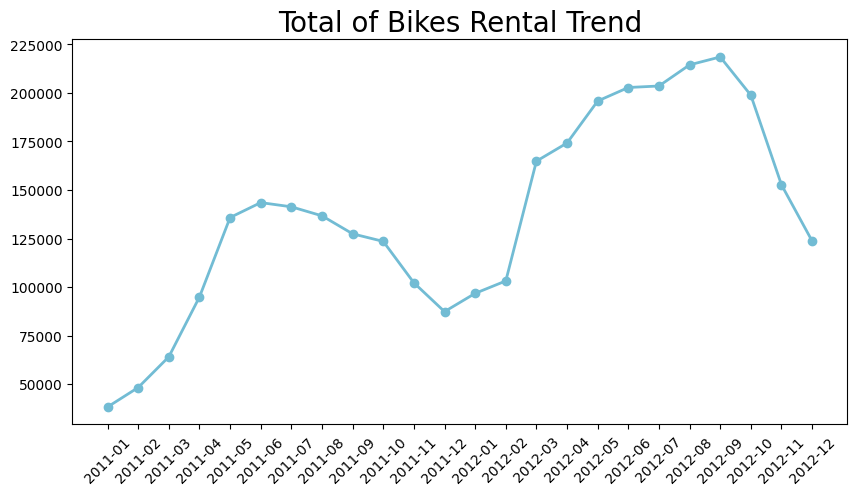

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_bike_rental["date"], monthly_bike_rental["total_rental_bikes"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total of Bikes Rental Trend", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)  # Memutar label sumbu x sebesar 45 derajat
plt.yticks(fontsize=10)
plt.show()

Mencari persentase dari trend rental sepeda

In [97]:
# Mengambil nilai pertama dan terakhir dari total_rental_bikes
first_value = monthly_bike_rental["total_rental_bikes"].iloc[0]
last_value = monthly_bike_rental["total_rental_bikes"].iloc[-1]

# Menghitung persentase kenaikan
percentage_increase = ((last_value - first_value) / first_value) * 100

# Menampilkan persentase kenaikan
print("Persentase kenaikan: {:.2f}%".format(percentage_increase))

Persentase kenaikan: 223.95%


<br>

### **Pertanyaan 2: Bagaimana pengaruh perubahan musim terhadap rata-rata perentalan sepeda?**

Melakukan grouping dengan kategori season terhadap jumlah rental sepeda

In [98]:
season_bike_rental = bike_df.groupby(by='season').total_rental_bikes.mean().sort_values(ascending = False).reset_index()

Membuat bar chart

<ipython-input-99-b609e90a69d6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


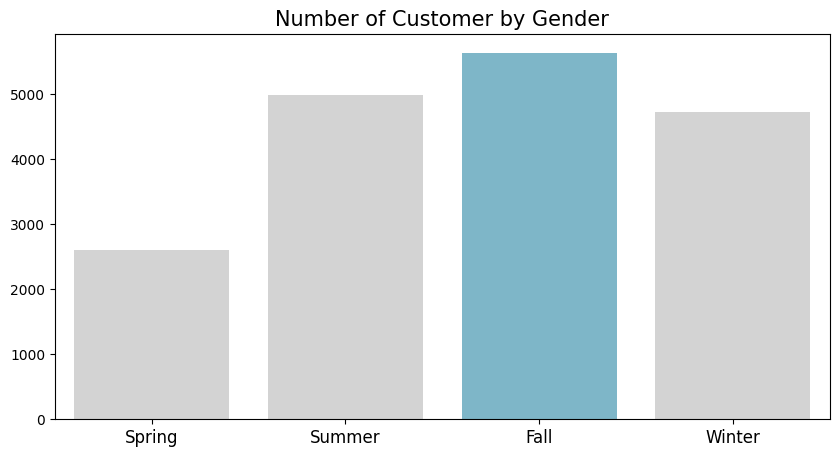

In [99]:
#Membuat bar chart
plt.figure(figsize=(10, 5))

sns.barplot(
    data = season_bike_rental,
    x="season",
    y="total_rental_bikes",
    palette=["#72BCD4" if season == season_bike_rental['season'].iloc[2] else "#D3D3D3" for season in season_bike_rental['season']]
)

plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

<br>

### **Pertanyaan 3: Bagaimana pengaruh perbedaan hari kerja dan tidak terhadap intensitas perentalan sepeda?**

Mengelompokan kategori dari working day terhadap jumlah rental sepeda

In [100]:
pie_chart_workingday = bike_df.groupby(by='workingday').total_rental_bikes.sum().reset_index()

Membuat pie chart yang berisi persentase dari jumlah rental sepeda berdasarkan working day

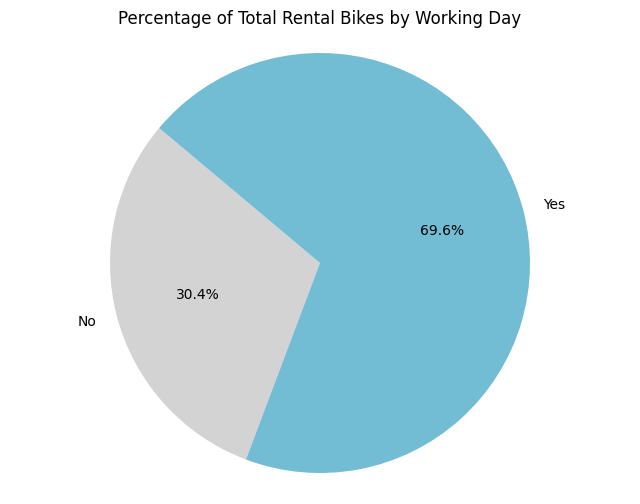

In [101]:
labels = pie_chart_workingday['workingday']
sizes = pie_chart_workingday['total_rental_bikes']
colors = ['#D3D3D3', '#72BCD4']

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Percentage of Total Rental Bikes by Working Day')
plt.axis('equal')
plt.show()

## **Conclusion**

Conclusion pertanyaan 1 : Bagaimana trend perentalan peminjaman sepeda?
- Berdasarkan trend rental sepeda tahun 2011, jumlah tertinggi rental sepeda terdapat pada bulan Juni, lalu trend mengalami penurunan hingga bulan Desember.
- Berdasarkan trend rental sepeda tahun 2012, jumlah tertinggi rental sepeda terdapat pada bulan September, lalu trend mengalami penurunan hingga bulan Desember
- Berdasarkan trend total dari tahun 2011 hingga 2012, keseluruhan trend mengalami kenaikan yang signifikan. Namun terjadi perilaku penurunan di tiap tahunnya ketika sudah memasuki bulan Oktober hingga Desember.

<br>Conclution pertanyaan 2 : Bagaimana pengaruh perubahan musim terhadap rata-rata perentalan sepeda?
- Pada musim Fall atau Gugur terjadi kenaikan tertinggi dari perentalan sepeda, dan jumlah terendah dari perentala sepeda terjadi pada musim Spring atau Semi.

<br>Conclution pertanyaan 3 : Bagaimana pengaruh perbedaan hari kerja terhadap intensitas perentalan sepeda?
- Penggunaan rental sepeda lebih sering banyak digunakan ketika hari sedang bekerja, ketika user tidak bekerja mereka cenderung tidak melakukan perentalan sepeda. Hal ini menunjukkan bahwa rental sepeda cenderung digunakan untuk bekerja.

In [102]:
bike_df.to_csv("bike_df.csv", index=False)

In [103]:
bike_2011_df.to_csv("bike_2011_df.csv", index=False)
bike_2012_df.to_csv("bike_2012_df.csv", index=False)